# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
sns.set_style('whitegrid')

### Reading data

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts()[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique title codes in 'title' column**

In [9]:
df['title'].nunique()

110

## Creating new features

#### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

In [10]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

___
## EDA

<AxesSubplot:xlabel='Reason', ylabel='count'>

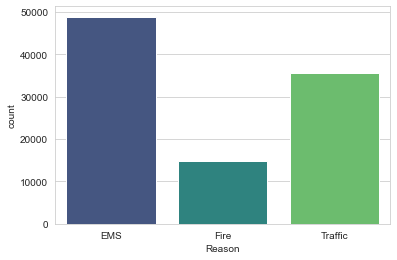

In [13]:
sns.countplot(data=df,x='Reason',palette='viridis') 

#### Pallette options

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 
'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 
'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r',
 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet',
'jet_r', 'magma', 'magma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', ' 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


#### The data type of the objects in the timeStamp column?

In [14]:
type(df['timeStamp'].iloc[0])

str

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**Using apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column**

In [18]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x:x.day%7) #or use x.dayofweek

In [19]:
df['Day of Week'].value_counts()

2    16080
1    16048
3    15051
4    13359
5    13131
0    12993
6    12830
Name: Day of Week, dtype: int64

In [20]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,3
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,3
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,3
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,3


**Using the .map() with this dictionary to map the actual string names to the day of the week**

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

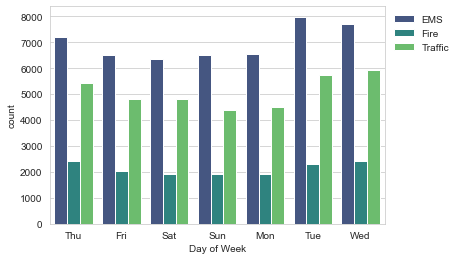

In [22]:
sns.countplot(data=df,x='Day of Week',hue='Reason',palette='viridis')


plt.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=False)

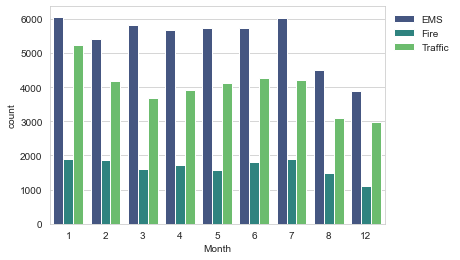

In [23]:
sns.countplot(data=df,x='Month',hue='Reason',palette='viridis')


plt.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=False)

**Missing some Months**

In [24]:
byMonth=df.groupby('Month')
byMonth.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Text(0.5, 0, 'Month')

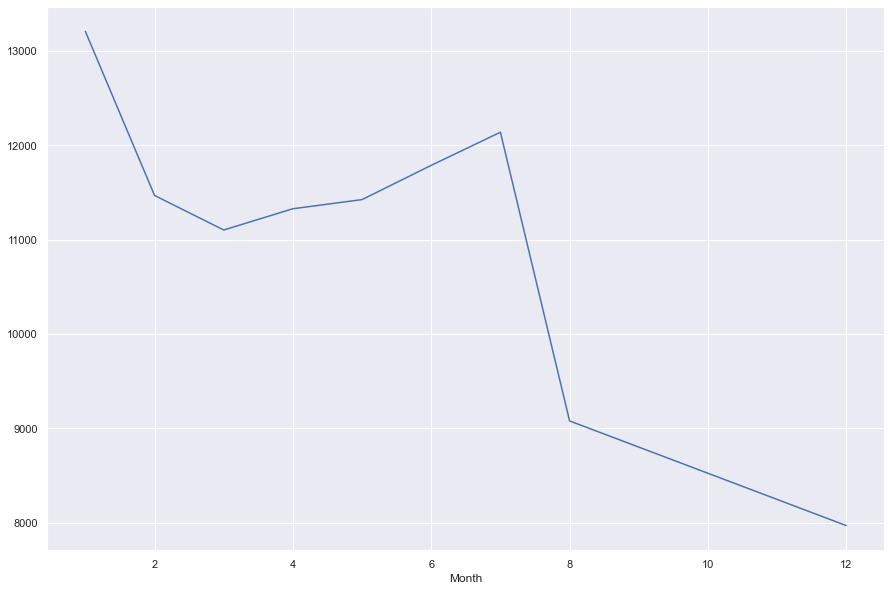

In [42]:
plt.figure(figsize=(15,10))
plt.plot(byMonth.count().index,byMonth.count()['lat'],'b')
plt.xlabel('Month')


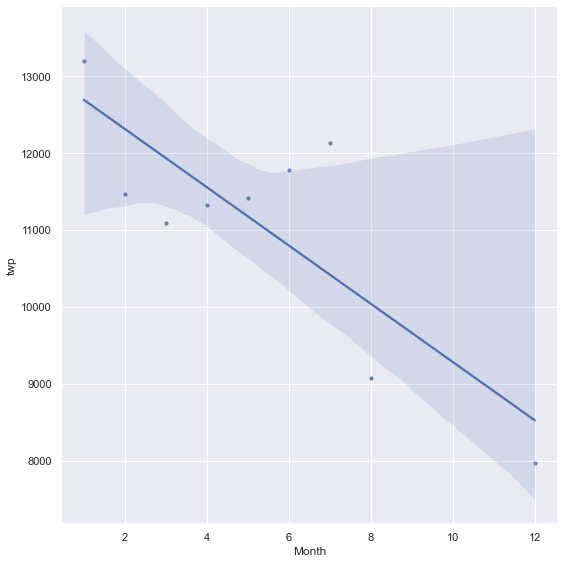

In [52]:
df1=byMonth.count()
df1.reset_index(inplace=True)
sns.lmplot(x='Month',y='twp',data=df1,height=8,aspect=1,scatter_kws={'s':10})

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [28]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Thu,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Thu,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Thu,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Thu,2016-08-24


**Groupby Date column with the count() aggregate**

Text(0.5, 1.0, 'Traffic')

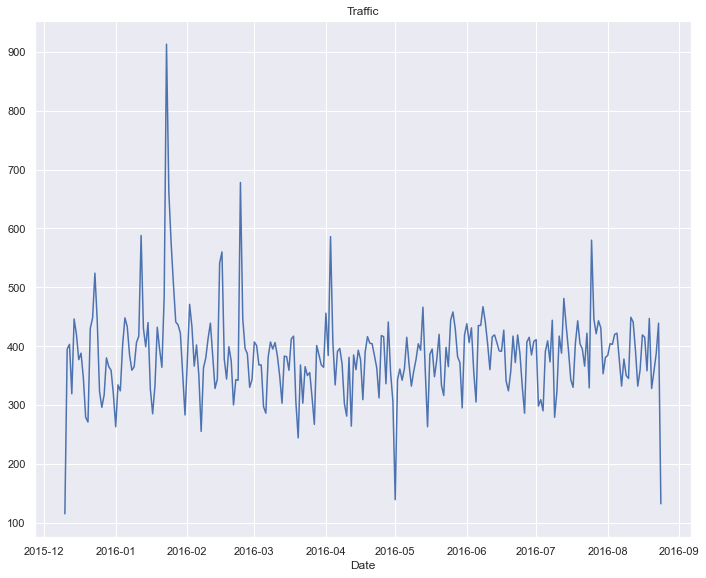

In [55]:
df.groupby('Date').count()['twp'].plot(figsize=(10,8))
plt.tight_layout()
plt.title('Traffic')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

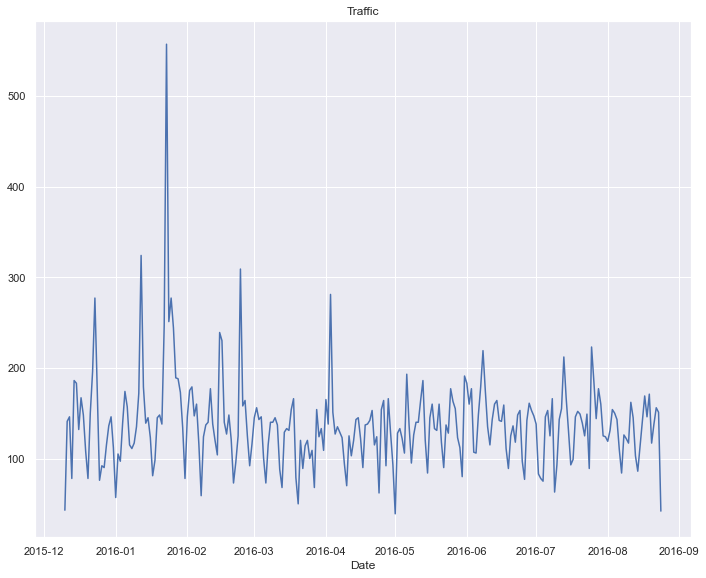

In [54]:
df3=df[df['Reason']=='Traffic']
byDate=df3.groupby('Date')
df4=byDate.count()
df4.reset_index(inplace=True)
df4.plot.line(x='Date',y='lat',figsize=(10,8),legend=False)
plt.tight_layout()
plt.title('Traffic')


Text(0.5, 1.0, 'Fire')

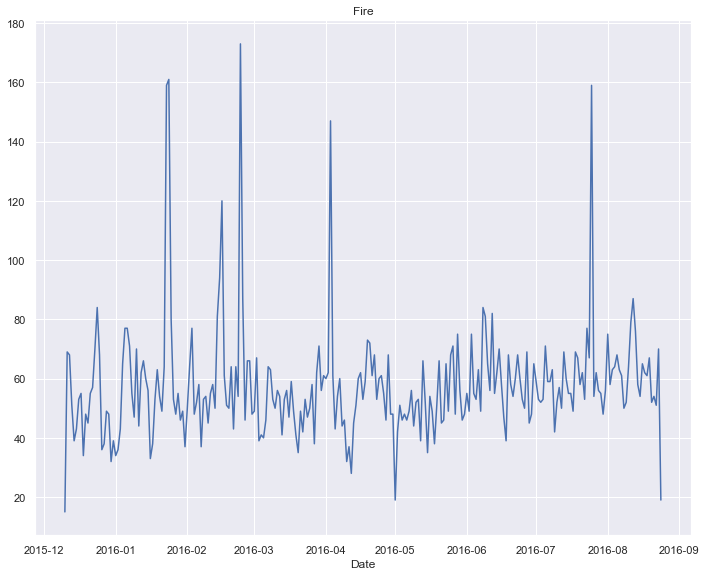

In [56]:
df3=df[df['Reason']=='Fire']
byDate=df3.groupby('Date')
df4=byDate.count()
df4.reset_index(inplace=True)
df4.plot.line(x='Date',y='lat',figsize=(10,8),legend=False)
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

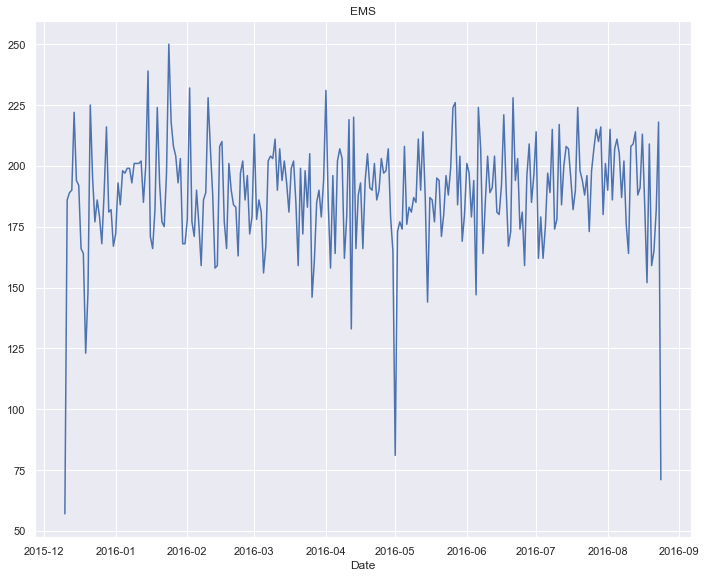

In [57]:
df3=df[df['Reason']=='EMS']
df3.groupby('Date').count()['twp'].plot(figsize=(10,8))
plt.tight_layout()
plt.title('EMS')

____
**Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [34]:
df5=df.pivot_table(values='e',index='Day of Week',columns='Hour',aggfunc='sum')
df5

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,293,200,201,165,170,206,287,554,748,769,...,798,876,852,882,787,664,591,480,454,313
Mon,308,235,259,186,170,208,334,450,606,718,...,770,770,839,877,773,652,519,479,413,322
Sat,249,228,189,180,176,184,303,483,661,667,...,798,848,893,838,766,719,565,576,425,343
Sun,283,259,193,212,193,210,324,506,654,652,...,821,776,804,824,714,652,566,483,430,329
Thu,325,260,216,223,245,262,391,679,769,820,...,843,877,930,932,892,745,739,627,523,402
Tue,333,233,242,206,247,274,452,620,830,846,...,1021,1038,1050,1066,889,718,723,554,536,426
Wed,321,306,249,263,217,285,422,678,776,842,...,946,969,1122,1098,941,758,674,589,502,424


**OR  USE GROUPBY AND UNSTACK**

In [35]:
df7=df.groupby(['Day of Week','Hour']).count()['lat'].unstack(1)
df7

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,293,200,201,165,170,206,287,554,748,769,...,798,876,852,882,787,664,591,480,454,313
Mon,308,235,259,186,170,208,334,450,606,718,...,770,770,839,877,773,652,519,479,413,322
Sat,249,228,189,180,176,184,303,483,661,667,...,798,848,893,838,766,719,565,576,425,343
Sun,283,259,193,212,193,210,324,506,654,652,...,821,776,804,824,714,652,566,483,430,329
Thu,325,260,216,223,245,262,391,679,769,820,...,843,877,930,932,892,745,739,627,523,402
Tue,333,233,242,206,247,274,452,620,830,846,...,1021,1038,1050,1066,889,718,723,554,536,426
Wed,321,306,249,263,217,285,422,678,776,842,...,946,969,1122,1098,941,758,674,589,502,424


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

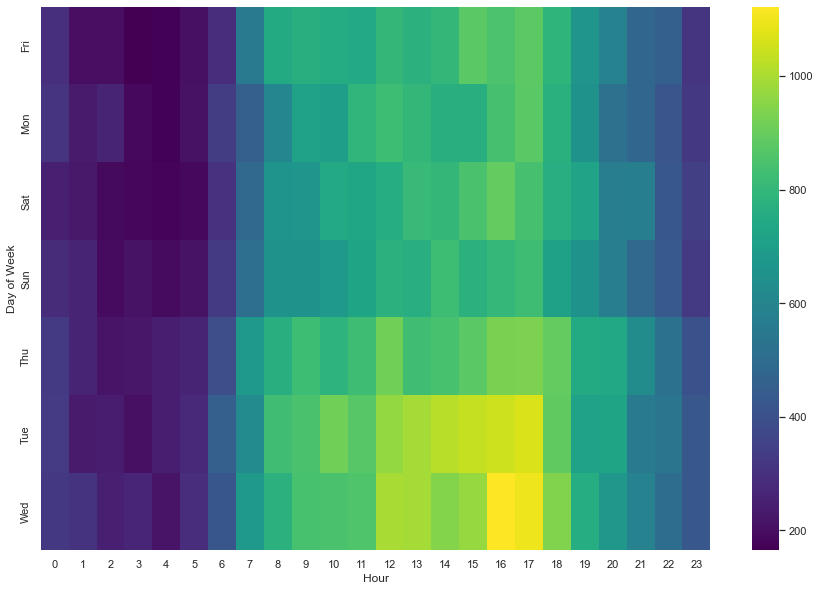

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df5,cmap='viridis')

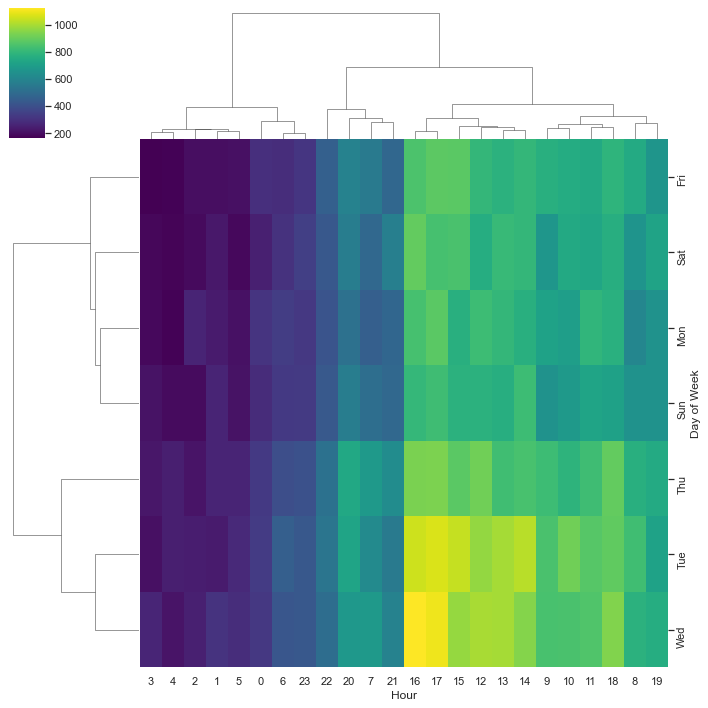

In [59]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.clustermap(data=df5,cmap='viridis')

**Now for a DataFrame that shows the Month as the column.**

In [38]:
df6=df.pivot_table(values='lat',index='Day of Week',columns='Month',aggfunc='count')
df6

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1727,1596,1525,1598,1538,1388,1692,1230,1065
Mon,1584,1229,1535,1601,1444,1676,1646,1021,1257
Sat,1973,1581,1266,1430,1590,1333,1670,1310,978
Sun,1700,1441,1102,1517,1730,1617,1717,1099,907
Thu,1960,1903,1900,1488,1918,1649,1672,1295,1266
Tue,1970,1964,1884,1958,1424,2058,2045,1511,1234
Wed,2291,1753,1889,1734,1779,2065,1695,1612,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

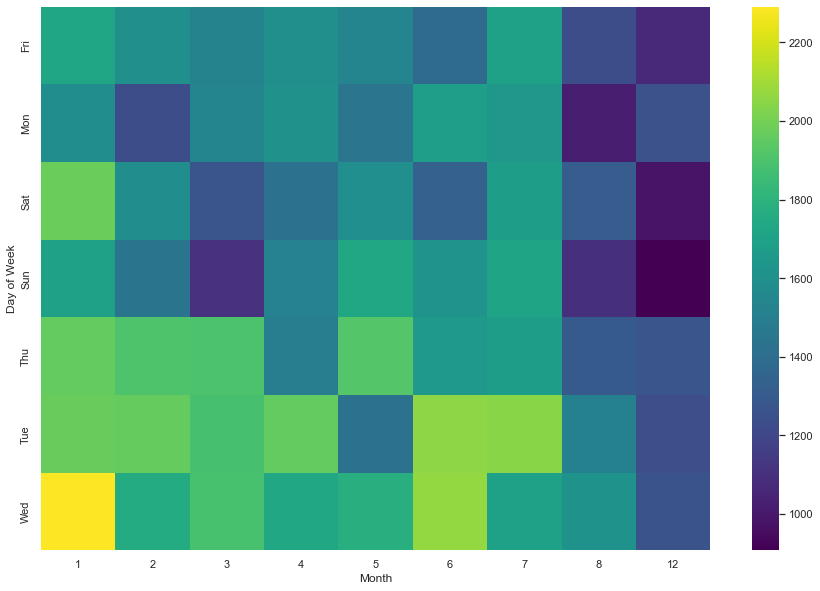

In [60]:
sns.heatmap(data=df6,cmap='viridis')

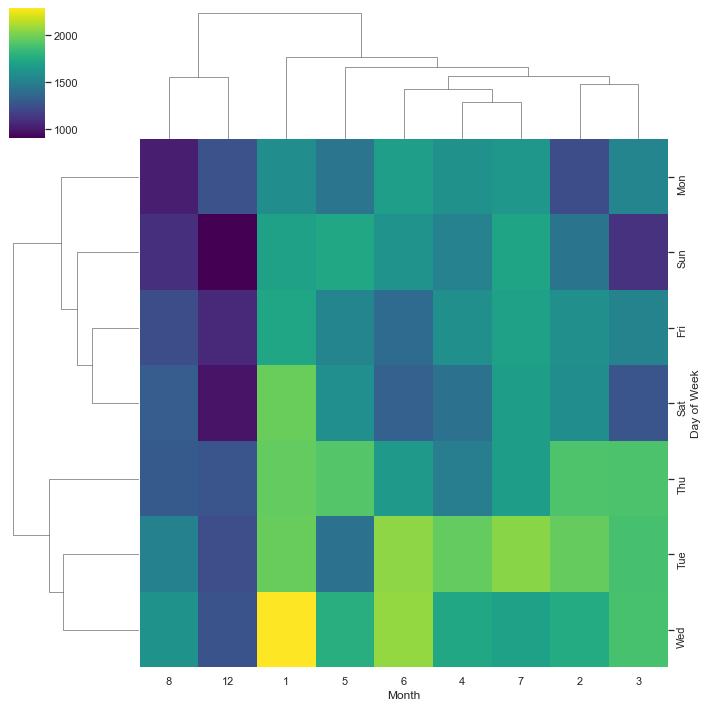

In [61]:
sns.clustermap(data=df6,cmap='viridis')